In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
import convolution
import detect_edges

N = 7
K = np.ones((N,N))/(N*N)
img = plt.imread("sudoku.png")
gray = img.sum(axis=2)
nRows = gray.shape[0]
nCols = gray.shape[1]
plt.imshow(gray,cmap="gray")

### Testing the convolution on an averaging filter

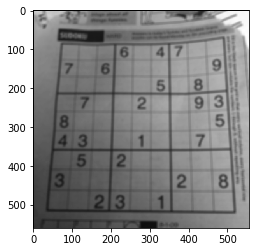

In [122]:
blur = convolution.convolution(gray, K)
plt.imshow(blur, cmap='gray')

### Testing the convolution with a sobel kernel for edge detection

In [5]:
sobel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_vertical = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
sobel = sobel_horizontal * sobel_vertical


Wall time: 9.5 s
Wall time: 9.58 s


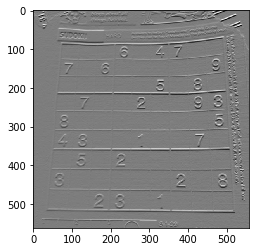

In [123]:
%time img_sobel_h = convolution.convolution(gray, sobel_horizontal)
%time img_sobel_v = convolution.convolution(gray, sobel_vertical)

plt.imshow(img_sobel_h, cmap='gray')

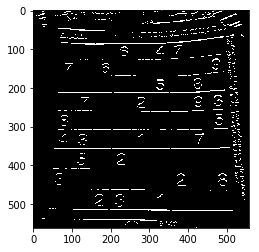

In [124]:
# Plot the image after applying horizontal sobel
b_img_sobel_h = (img_sobel_h > 1) * 1
plt.imshow(b_img_sobel_h, cmap='gray')

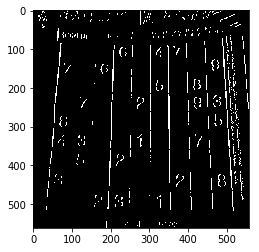

In [125]:
# Plot the image after applying vertical sobel
b_img_sobel_v = (img_sobel_v > 1) * 1
plt.imshow(b_img_sobel_v, cmap='gray')

array([[ 1,  0, -1],
       [ 0,  0,  0],
       [-1,  0,  1]])

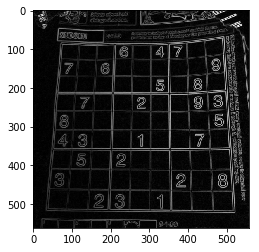

In [126]:
# Plot the image after applying soble vertically and horizontally

img_sobel = abs(1/np.sqrt(2)) * np.sqrt( (img_sobel_v)**2 + (img_sobel_h)**2 )
plt.imshow(img_sobel, cmap='gray')
sobel

# Use convolution separable

In [6]:
sobel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

flattened = gray.reshape(-1)

%time out = convolution.convolution_separable(flattened, sobel)

out = out.reshape((nRows, nCols))
plt.imshow(out,cmap='gray')

In [11]:
U,S,V = np.linalg.svd(sobel)
print(U)
print(V.T)
V.T

# Test edge detection function

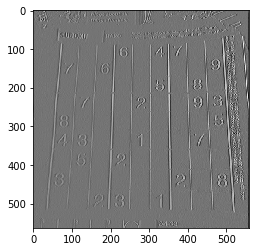

In [13]:
edge_sobel_img = detect_edges.detect_edges_sobel(gray)
edge_sobel_img *= 255.0/edge_sobel_img.max()  
plt.imshow(edge_sobel_img,cmap='gray')